In [1]:
using ImmersedLayers

In [2]:
using Revise

In [3]:
using Plots

In [4]:
using Interpolations

In [11]:
x = [1,0,1,0.5,0.25]
Ntheta = 500
theta = collect(range(0,2π,Ntheta))
r = [x[1]+im*x[2] + x[4]*exp(1im*theta[i]) + x[5]*exp(2im*theta[i]) for i in 1:Ntheta]
interpolator_real = linear_interpolation(theta,real(r))
interpolator_imag = linear_interpolation(theta,imag(r))

500-element extrapolate(interpolate((::Vector{Float64},), ::Vector{Float64}, Gridded(Linear())), Throw()) with element type Float64:
  0.0
  0.012590721929262947
  0.025176453641326445
  0.03775220760883931
  0.050313001682516345
  0.06285386177609609
  0.07536982454641106
  0.08785594006694618
  0.1003072744932651
  0.11271891271868897
  ⋮
 -0.10030727449326521
 -0.08785594006694686
 -0.07536982454641142
 -0.06285386177609614
 -0.05031300168251697
 -0.037752207608839614
 -0.025176453641326438
 -0.012590721929263509
 -2.4492935982947064e-16

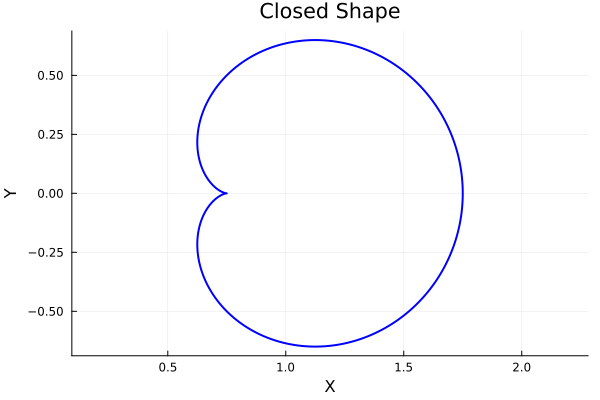

In [69]:
plot(real(r), imag(r), linecolor=:blue, linewidth=2, aspect_ratio=:equal, grid=true, legend=false)
title!("Closed Shape")
xlabel!("X")
ylabel!("Y")

In [78]:
interpolator_real(π/4)

1.3535468675677877

In [93]:
Δx = 0.01
xlim = (0,2)
ylim = (-1,1)
g = PhysicalGrid(xlim,ylim,Δx)
cache = SurfaceScalarCache(g)

Surface cache with scaling of type GridScaling
  0 point data of type ScalarData{0, Float64, Vector{Float64}}
  Grid data of type Nodes{Primal, 210, 210, Float64, Matrix{Float64}}


In [94]:
T = zeros_grid(cache)
xg, yg = coordinates(T,g)

(-0.04:0.01:2.04, -1.04:0.01:1.04)

In [95]:
theta_g = zeros_grid(cache)
for (j,yy) in enumerate(yg), (i,xx) in enumerate(xg)
    theta_g[i,j] = (yy-x[2])>=0 ? atan((yy-x[2]),(xx-x[1])) : (atan((yy-x[2]),(xx-x[1]))+2π)
    if ((xx-x[1])^2+(yy-x[2])^2) < ((interpolator_real(theta_g[i,j])-x[1])^2+(interpolator_imag(theta_g[i,j])-x[2])^2)
        T[i,j] = -x[3]
    end
end

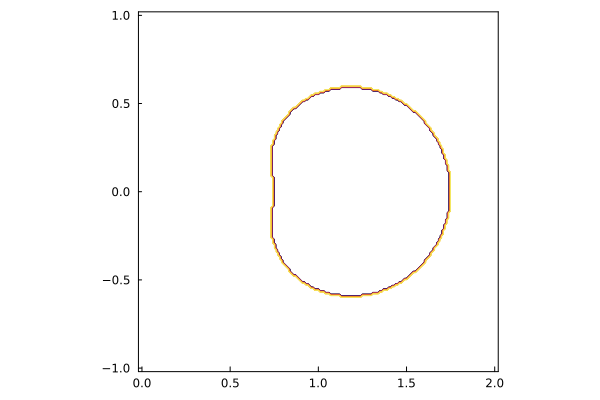

In [96]:
plot(T,cache)

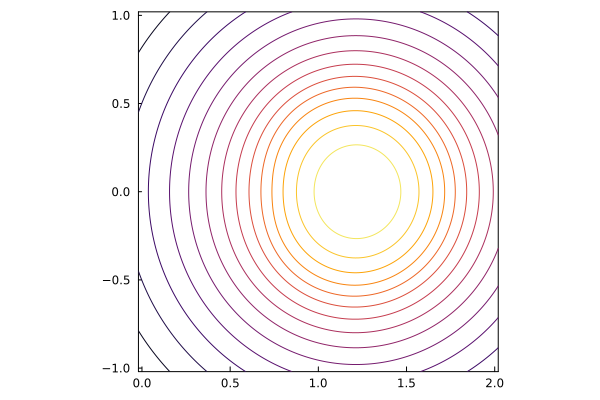

In [97]:
inverse_laplacian!(T,cache)
plot(T,cache)